# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

<IPython.core.display.Javascript object>


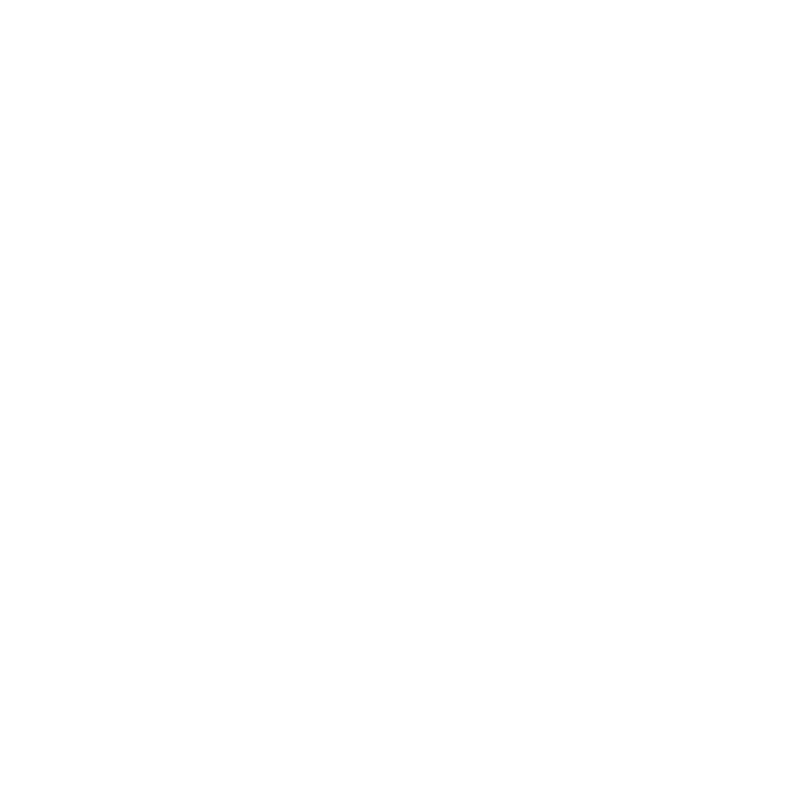

In [38]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:27: PerformanceWarning: indexing past lexsort depth may impact performance.


<IPython.core.display.Javascript object>


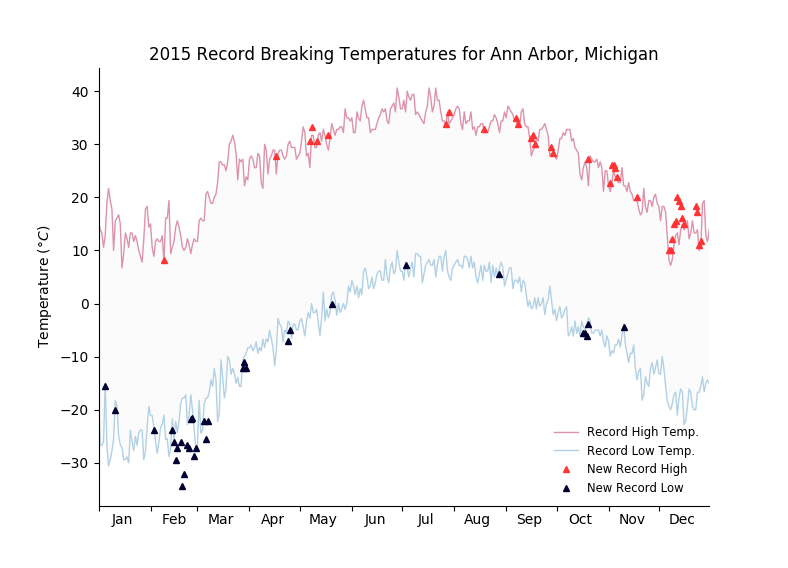

In [39]:
%matplotlib notebook 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime, date
import mplleaflet

#Read in the Data Set
weather = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

#Convert the Date Format
weather["Date"] = pd.to_datetime(weather["Date"], format="%Y-%m-%d")

#Sort the Data Values 
weather.sort_values(by="Date", inplace = True)

#Create new month and day variables from data string
weather["Day"] = pd.DatetimeIndex(weather["Date"]).day
weather["Month"] = pd.DatetimeIndex(weather["Date"]).month

#Set the Month and Day variables as the index values
weather.set_index(["Month", "Day"], inplace=True)

#Drop leap day values from the data set
weather = weather[~weather.index.isin(weather.loc[2,29].index)]

#Convert temp values from tenths of degrees to degrees
weather["Data_Value"] *= 0.1;

#create a new data set to manipulate
newfull = weather[["Date", "Element", "Data_Value"]]

#Separate 2015 data from 2005-2014 data
new2015 = newfull.loc[newfull["Date"] >= "2015-01-01"]
newfull = newfull.loc[newfull["Date"] < "2015-01-01"]

#Get full data sets with only low and high temperature values
cold = newfull.loc[newfull["Element"] == "TMIN"]
hot = newfull.loc[newfull["Element"] == "TMAX"]

#Get 2015 data sets with only low and high temperature values
cold2015 = new2015.loc[new2015["Element"] == "TMIN"]
hot2015 = new2015.loc[new2015["Element"] == "TMAX"]

#Only keep maxes and mins for full data set
mintemp = cold.groupby(level=["Month","Day"])["Data_Value","Date"].min()
maxtemp = hot.groupby(level=["Month","Day"])["Data_Value","Date"].max()

#Only keep maxes and mins for 2015 data set
mintemp2015 = cold2015.groupby(level=["Month","Day"])["Data_Value","Date"].min()
maxtemp2015 = hot2015.groupby(level=["Month","Day"])["Data_Value","Date"].max()

#Only keep 2015 values above or below full data set values
mintemp2015 = mintemp2015[mintemp2015["Data_Value"] < mintemp["Data_Value"]]
maxtemp2015 = maxtemp2015[maxtemp2015["Data_Value"] > maxtemp["Data_Value"]]

#Creates an array of date time objects
dates = np.arange("2015-01-01", "2016-01-01", dtype="datetime64[D]")
maxtemp["Dates"] = dates
mintemp["Dates"] = dates

#Sets the dates as the index
maxtemp.set_index("Dates", inplace=True)
mintemp.set_index("Dates", inplace=True)

fmt = mdates.DateFormatter('%d-%m')
plt.figure()
ax=plt.gca()

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
ax.set_title("2015 Record Breaking Temperatures for Ann Arbor, Michigan")
plt.ylabel('Temperature ($\degree C$)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.plot(maxtemp.index, maxtemp["Data_Value"], "#DC93AB", linewidth=1, label="Record High Temp.", alpha=1, zorder=1)
plt.plot(mintemp.index, mintemp["Data_Value"], "#B2D1E4", linewidth=1, label="Record Low Temp.", alpha=1, zorder=1)
ax.fill_between(mintemp.index, mintemp["Data_Value"], maxtemp["Data_Value"], facecolor="#E0E0E0", alpha=0.1)

ax.plot(maxtemp2015["Date"], maxtemp2015["Data_Value"], "^", color="#FF3333", markersize=5, label="New Record High", alpha=1, zorder=2)
ax.plot(mintemp2015["Date"], mintemp2015["Data_Value"], "^", color="#000033", markersize=5, label="New Record Low", alpha=1, zorder=2)

ax.set_xlim([date(2015,1,1), date(2015,12,31)])
ax.tick_params(axis='x', which='minor', bottom=False)
ax.legend(fontsize="small", loc=4, frameon=False)





